
Ordinary differential equations
=========================================

Let’s consider a simple 1st order equation: 
$$\frac{dy}{dx}=f(x,y)$$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

Euler’s method
--------------

Suppose that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0,\end{eqnarray}$$ with
$y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:
$$\frac{\Delta y}{\Delta x}=f(x,y)$$ or 
$$\Delta y = f(x,y)\Delta x$$
and approximate the value of $y_1$ as
$$y_1=y_0+f(x_0,y_0)(x_1-x_0)$$ We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as
$$y_{2}=y_1+f(x_1,y_1)\Delta x,$$ or in the general case:
$$y_{n+1}=y_n+f(x_n,y_n)\Delta x$$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. The “local error” calculating $x_1$ is then
$O(\Delta x^2)$. If we use the method $N$ times to calculate $N$
consecutive points, the propagated “global” error will be
$NO(\Delta x^2)\approx O(\Delta 
x)$. This error decreases linearly with decreasing step, so we need to
halve the step size to reduce the error in half. The numerical work for
each step consists of a single evaluation of $f$.

### Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Below is a program that calculates the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Results are plotted for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compared with exact (analytical)
results.

In [6]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [20]:
T = T0
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    if i%10==0:
        print (i,i*dt, T)
        if i*dt==10:
            check=T
    # we can also do t = t - r*(t-ts)*dt, it would save some memory and processing time.
    

10 0.0390625 10.284655520559223
20 0.078125 10.56820105803098
30 0.1171875 10.850640940672996
40 0.15625 11.13197947986542
50 0.1953125 11.412220970176651
60 0.234375 11.691369689428885
70 0.2734375 11.969429898763416
80 0.3125 12.24640584270569
90 0.3515625 12.522301749230081
100 0.390625 12.79712182982445
110 0.4296875 13.07087027955441
120 0.46875 13.34355127712738
130 0.5078125 13.61516898495637
140 0.546875 13.885727549223505
150 0.5859375 14.155231099943336
160 0.625 14.423683751025868
170 0.6640625 14.691089600339367
180 0.703125 14.957452729772909
190 0.7421875 15.22277720529869
200 0.78125 15.48706707703409
210 0.8203125 15.750326379303496
220 0.859375 16.012559130699895
230 0.8984375 16.273769334146213
240 0.9375 16.533960976956394
250 0.9765625 16.79313803089631
260 1.015625 17.05130445224436
270 1.0546875 17.308464181851864
280 1.09375 17.564621145203233
290 1.1328125 17.81977925247587
300 1.171875 18.07394239859986
310 1.2109375 18.327114463317457
320 1.25 18.5792993112422

3760 14.6875 66.19926725574327
3770 14.7265625 66.26477987663496
3780 14.765625 66.33003703822249
3790 14.8046875 66.3950397366415
3800 14.84375 66.45978896414331
3810 14.8828125 66.52428570911003
3820 14.921875 66.58853095606976
3830 14.9609375 66.65252568571144
3840 15.0 66.71627087489998


Let's plot the results. We first need to import the required libraries and methods

In [8]:
#%matplotlib inline
import numpy as np
from matplotlib import pyplot 

Next, we create numpy arrays to store the (x,y) values 

In [9]:
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)

We have to re write the loop to store the values in the arrays. Remember that numpy arrays start from 0.

In [10]:
T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = T - r*(T-Ts)*dt
    my_time[i] = i*dt
    my_temp[i] = T
    

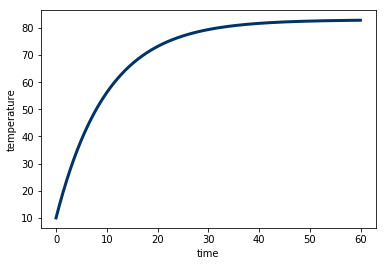

In [11]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

We could have saved effort by defining

In [12]:
my_time = np.linspace(0.,tmax,nsteps)

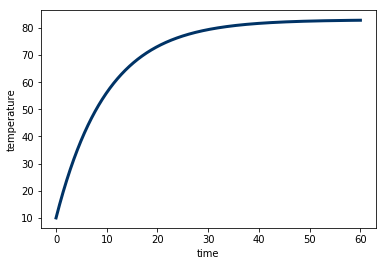

In [13]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [14]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

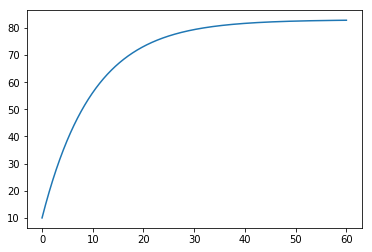

In [15]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
pyplot.plot(my_time,my_temp)

Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [16]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps on the convergence. Notice the initial time step `dt=1`; it is then divided in half in every iteration:

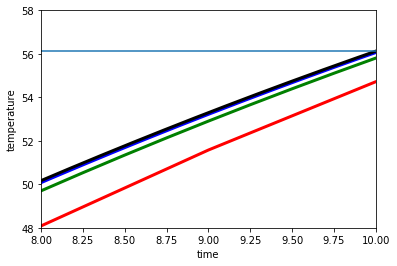

In [21]:
dt = 1.
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/4.
pyplot.plot(my_time,check*np.ones([len(my_time),1]))
pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10)
pyplot.ylim(48,58);

Runge-Kutta methods
-------------------

### 2nd order Runge-Kutta

Euler’s method rests on the idea that the slope at one point can be used
to extrapolate to the next. A plausible idea to make a better estimate
of the slope is to extrapolate to a point halfway across the interval,
and then to use the derivative at this point to extrapolate across the
whole interval. Thus,

$$\begin{eqnarray}
k&=&\Delta x f(x_n,y_x), \\
y_{n+1}&=&y_n+\Delta x f(x+\Delta x/2, y_n+k/2) + O(\Delta 
x^3).\end{eqnarray}$$

It has the same accuracy as the Taylor series. It requires
the evaluation of $f$ twice for each step.

### 4th order Runge-Kutta

Similar ideas can be used to derive a 3rd or 4th order Runge-Kutta
method. It has been found by experience that the best balance between
accuracy and computational effort is given by a fourth-order algorithm.
Such a method would require evaluating $f$ four times at each step, with
a local accuracy of $O(\Delta x^5)$. It can be written as follows:
$$\begin{eqnarray}
 k_1&=&\Delta x f(x_n,y_n), \\
 k_2&=&\Delta x f(x_n+\Delta x/2,y_n+k_1/2), \\
 k_3&=&\Delta x f(x_n+\Delta x/2,y_n+k_2/2), \\
 k_4&=&\Delta x f(x_n+\Delta x,y_n+k_3), \\
 y_{n+1}&=&y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)+O(\Delta x^5).\end{eqnarray}$$

Runge-Kutta method are self-staring, meaning that they can be used to
obtain the first few iterations for a non self-starting algorithm.

### Newton's Law of Cooling

Using the 4th order Runge-Kutta Methods,

In [ ]:
def rk4insteps(T,func,dt):
    k1 = dt*func(T,dt)
    k2 = dt*func(T+0.5*k1,dt)
    k3 =dt*func(T+0.5*k2,dt)
    k4 = dt*func(T+k3,dt)
    T += (k1+2*k2+2*k3+k4)/6
    return T

In [ ]:
fT = lambda T,t: -r*(T-Ts)
T = T0
dt = 0.05
for i in range(1,nsteps):
    T = rk4insteps(T, fT, dt)
    my_temp[i] = T
pyplot.plot(my_time,my_temp)

In [ ]:
dt = 1
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = rk4insteps(T,fT,dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/4.
pyplot.plot(my_time,check*np.ones([len(my_time),1]))
pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10)
pyplot.ylim(48,58);

# ODE solvers in `scipy.integrate`
The `scipy` package contains a number of ode solvers that act much like analogous functions in MATLAB. They include:

- `OdeSolution`: Continuous ODE solution.
- `odeint`: (*deprecated, but it still works*) Integrate a system of ordinary differential equations.
- `solve_ivp`: Solve an initial value problem for a system of ODEs.

There are also a number of routines - functions that don't solve the equation for you, but act as 1 step in the solving process, much like the "homegrown" routines in `diffeq.py` that I have supplied

- `solve_ivp`: Solve an initial value problem for a system of ODEs.
- `RK23`: Explicit Runge-Kutta method of order 3(2).
- `RK45`:	Explicit Runge-Kutta method of order 5(4).
- `Radau`: Implicit Runge-Kutta method of Radau IIA family of order 5.
- `BDF`: Implicit method based on backward-differentiation formulas.
- `LSODA`: Adams/BDF method with automatic stiffness detection and switching.

And finally, there are some class methods, but they require a little too much set up for us.

- `OdeSolver`: Base class for ODE solvers.
- `DenseOutput`: Base class for local interpolant over step made by an ODE solver.

You should refer to the [scipy reference page](https://docs.scipy.org/doc/scipy/reference/integrate.html) for more details. Below are several examples of ode solvers using the equation, $$\frac{dy}{dx} +y = x,$$ where $y(0)=1$, as shown in [ode example](http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html)

In [22]:
import scipy.integrate as scint
func= lambda y,x: -y+x
yexact = lambda x: x-1+2*np.exp(-x)
y0=1
xspan = np.linspace(0,5,100)

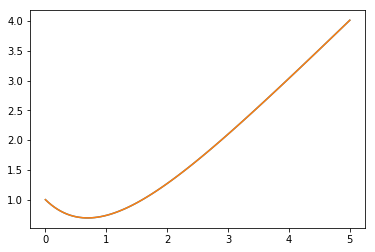

In [23]:
ysol1 = scint.odeint(func,y0,xspan)
ysol1 = np.ndarray.flatten(ysol1)
pyplot.plot(xspan,ysol1)
pyplot.plot(xspan,yexact(xspan))

Text(0.5, 0, 'x')

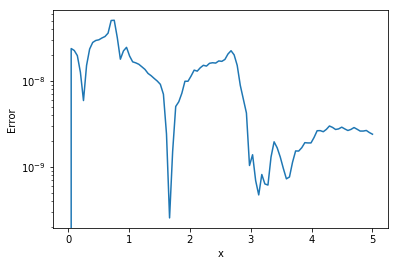

In [24]:
ydiff = np.abs(yexact(xspan) - ysol1)
pyplot.semilogy(xspan,ydiff)
pyplot.ylabel("Error")
pyplot.xlabel("x")